In [15]:
#K-Means
#El algoritmo K-Means es una técnica de agrupamiento que tiene como objetivo dividir un conjunto de datos en K clústeres (definido como parámetro de entrada), de manera que los puntos dentro de cada clúster sean similares entre sí y diferentes a los puntos en otros clústeres.

#Es un proceso iterativo compuesto de varios pasos:

#1. Inicialización. El proceso comienza definiendo K puntos aleatorios del conjunto de datos como centroides iniciales. Los centroides son puntos representativos que servirán como los centros iniciales de cada cluster.
#2. Asignación de puntos a clusters. Cada punto del conjunto de datos se asigna al cluster cuyo centroide es el más cercano. Esto se hace calculando la distancia entre cada punto y los centroides, y asignando el punto al cluster cuyo centroide tiene la distancia más pequeña. Las distancias utilizadas y disponibles son las que estudiamos en el módulo del modelo KNN y las puedes encontrar aquí.
#3. Actualización de centroides. Una vez que todos los puntos están asignados a sus clusters correspondientes, los centroides se actualizan recalculando su posición como el promedio de todos los puntos asignados a ese cluster. Este paso reubica los centroides al centro geométrico de cada grupo.
#4. Iteración. Se repiten los pasos 2 y 3 hasta que los centroides ya no cambian significativamente y los puntos están estables en sus clusters. Es decir, el algoritmo continúa asignando y actualizando puntos hasta que se alcanza la convergencia.
#5. Resultado. Una vez que el algoritmo ha convergido, los puntos del conjunto de datos están agrupados en K clusters o grupos, y cada clusterestá representado por su centroide. Los grupos obtenidos representan conjuntos de puntos similares.
# https://storage.googleapis.com/breathecode-asset-images/330f00bd861de96479bb8f4c759844f11525d99aa37b31e74933585556ec52bc.gif?raw=true

In [16]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [17]:
#Me piden que me quede con unas columnas especificas
df2 = df[['MedInc','Latitude','Longitude']]

In [18]:
#Acá en el EDA debo rellenar o quitar valores faltantes, verifico que no hay nulos entonces sigo el proceso normal :)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [19]:
from sklearn.model_selection import train_test_split
#No hay Ytrain ni Ytest, porque no tengo etiquetas en modelos no supervisados
#No existe la clasificación a predecir (variable Y)
X_train, X_test = train_test_split(df2, test_size=0.2, random_state=42)

In [20]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6,random_state=42)

X_train['cluster'] = model.fit_predict(X_train)

X_train

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5
...,...,...,...,...
11284,6.3700,33.78,-117.96,2
11964,3.0500,34.02,-117.43,3
5390,2.9344,34.03,-118.38,3
860,5.7192,37.58,-121.96,0


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement mpl_toolkits.mplot3d (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.mplot3d
Note: you may need to restart the kernel to use updated packages.


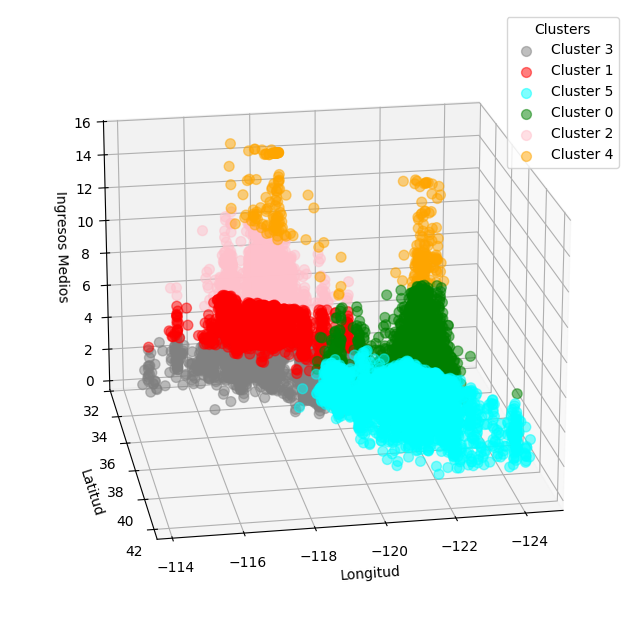

In [ ]:
#Ahora se debe ver el gráfico 
%pip install mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection = '3d')

colors=['gray','red','cyan','green','pink','orange']

for i, color in zip(X_train['cluster'].unique(),colors):
    subset = X_train[X_train['cluster']==i]
    ax.scatter(subset['Longitude'],subset['Latitude'],subset['MedInc'], s=50, alpha = 0.5, marker = 'o', c=[color], label =f'Cluster {i}')

    
    
ax.view_init(elev = 20,azim=80) #Con esto cambio desde donde se ve el gráfico.
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Ingresos Medios')
ax.legend(title='Clusters')

plt.show()
#Se evidencia que el rango salarial tiene una cierta dependencia con el lugar de residencia

In [22]:
#Ahora vamos a predecir los clusters de X_test (esto sería cuando lo haga yo con datos nuevos)

X_test['cluster'] = model.predict(X_test)
X_test

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5
...,...,...,...,...
15362,4.6050,33.36,-117.22,1
16623,2.7266,35.36,-120.83,5
18086,9.2298,37.31,-122.05,4
2144,2.7850,36.77,-119.76,5


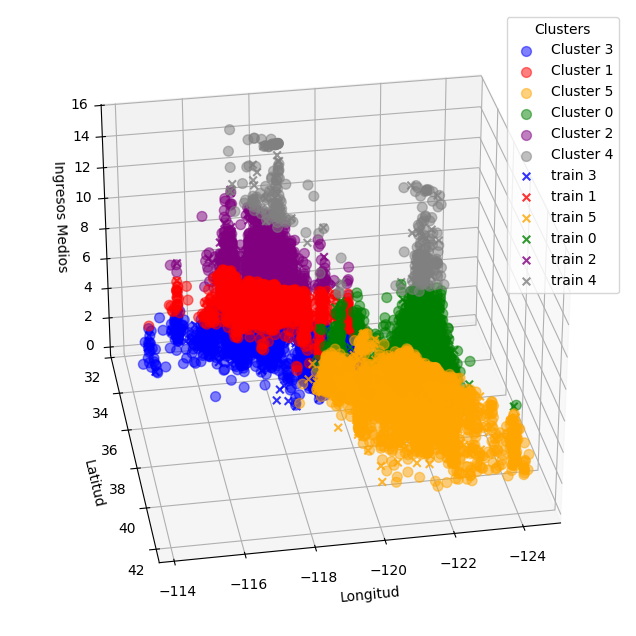

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

colors=['blue','red','orange','green','purple','gray']

for i, color in zip(X_train['cluster'].unique(),colors):
    subset = X_train[X_train['cluster']==i]
    ax.scatter(subset['Longitude'],subset['Latitude'],subset['MedInc'],s=50,alpha=0.5,marker='o',c=[color], label=f'Cluster {i}')

for i, color in zip(X_train['cluster'].unique(),colors):
    subset = X_test[X_test['cluster']==i]
    ax.scatter(subset['Longitude'],subset['Latitude'],subset['MedInc'],s=30,alpha=0.8,marker='x',c=[color], label=f'train {i}')

ax.view_init(elev = 30,azim=80)

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Ingresos Medios')
ax.legend(title='Clusters')


In [24]:
#Ahora entrenaré un modelo

Y_train = X_train['cluster']
Y_test = X_test['cluster']
X_train = X_train.drop('cluster',axis=1)
X_test = X_test.drop('cluster',axis=1)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

model_rf = RandomForestClassifier(random_state=42)
model_xgb = XGBRFClassifier(random_state=42)

model_rf.fit(X_train,Y_train)
model_xgb.fit(X_train,Y_train)

Y_pred_rf = model_rf.predict(X_test)
Y_pred_xgb = model_xgb.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print(f'la precisión del RF es {accuracy_score(Y_test,Y_pred_rf)}')
print(f'la precisión del XGB es {accuracy_score(Y_test,Y_pred_xgb)}')


la precisión del RF es 0.9963662790697675
la precisión del XGB es 0.9934593023255814


In [27]:
from pickle import dump
dump(model, open('../models/k_means_6_42.sav','wb'))
dump(model, open('../models/random_forest_default_42.sav','wb'))
model_xgb.save_model('../models/XGBoost_default_42.json')